## Import required Libraries and define Functions

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from datetime import date
from datetime import datetime
from dateutil.parser import parse

In [203]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        pass
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Loan Performance Data

#### Load, explore and clean Loan performance Data 

In [58]:
# import data and merge

trainperf = pd.read_csv('trainperf.csv.xls')
testperf = pd.read_csv('testperf.csv.xls')
perf1 = pd.concat([trainperf, testperf], axis=0)

In [59]:
perf1.shape

(5818, 10)

In [60]:
# overview of the data
perf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5818 entries, 0 to 1449
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     5818 non-null   object 
 1   systemloanid   5818 non-null   int64  
 2   loannumber     5818 non-null   int64  
 3   approveddate   5818 non-null   object 
 4   creationdate   5818 non-null   object 
 5   loanamount     5818 non-null   float64
 6   totaldue       5818 non-null   float64
 7   termdays       5818 non-null   int64  
 8   referredby     771 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 500.0+ KB


In [61]:
# check for columns in the data
trainperf.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag'],
      dtype='object')

In [62]:
testperf.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby'],
      dtype='object')

In [63]:
perf1.head(2)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good


In [64]:
# format the data: reset index and drop previous index column

perf = perf1.reset_index()
perf.drop(['index'],axis=1,inplace=True)

In [65]:
perf.tail()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
5813,8a858fb45bb59c21015bb88a191f58f2,301991141,3,47:02.0,46:53.0,10000.0,11500.0,15,NaN,NaN
5814,8a858fcb5b00cc54015b0253ced26a5f,301963018,3,00:45.0,04:05.0,10000.0,13000.0,30,NaN,NaN
5815,8a858fde56eb02280156f59b976d46c0,301994653,9,09:40.0,09:33.0,40000.0,48000.0,60,NaN,NaN
5816,8a858e10570f2d65015717fcfec44996,301961483,14,47:54.0,46:49.0,60000.0,68100.0,90,NaN,NaN
5817,8a858f605b911d60015b91b99d55400d,301973097,6,12:09.0,12:03.0,20000.0,22250.0,15,8a858ff259d1429e0159d2d0194c4b8e,NaN


In [66]:
perf.shape

(5818, 10)

In [67]:
perf.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag'],
      dtype='object')

In [68]:
perf.isna().sum()

customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
referredby       5047
good_bad_flag    1450
dtype: int64

In [69]:
perf.drop(['referredby'], axis=1, inplace=True)
perf.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag'],
      dtype='object')

In [70]:
perf

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good
...,...,...,...,...,...,...,...,...,...
5813,8a858fb45bb59c21015bb88a191f58f2,301991141,3,47:02.0,46:53.0,10000.0,11500.0,15,NaN
5814,8a858fcb5b00cc54015b0253ced26a5f,301963018,3,00:45.0,04:05.0,10000.0,13000.0,30,NaN
5815,8a858fde56eb02280156f59b976d46c0,301994653,9,09:40.0,09:33.0,40000.0,48000.0,60,NaN
5816,8a858e10570f2d65015717fcfec44996,301961483,14,47:54.0,46:49.0,60000.0,68100.0,90,NaN


In [71]:
# check for missing values in the data

perf.isna().sum()

customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
good_bad_flag    1450
dtype: int64

In [72]:
perf['good_bad_flag'].value_counts(dropna=False)

Good    3416
NaN     1450
Bad      952
Name: good_bad_flag, dtype: int64

In [73]:
# drop missing values in target variable column

perf['good_bad_flag'].dropna(axis=0,inplace=True)

In [74]:
perf['good_bad_flag'].value_counts(dropna=False)

Good    3416
Bad      952
Name: good_bad_flag, dtype: int64

In [75]:
perf.isna().sum()

customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
good_bad_flag    1450
dtype: int64

In [76]:
perf['good_bad_flag'].shape

(4368,)

In [77]:
perf.shape

(5818, 9)

In [78]:
# further exploratory data analysis
perf.head(10)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good
5,8a8589f35451855401546b0738c42524,301986516,8,2017-07-19 21:46:24.000000,2017-07-19 20:46:18.000000,30000.0,39000.0,60,Good
6,8a858e095c59b91b015c5e5cea3719bc,301972027,3,2017-07-10 19:25:33.000000,2017-07-10 18:25:28.000000,10000.0,13000.0,30,Good
7,8a858e1158dc4d830158f7bde4f47ea7,301994428,10,2017-07-24 23:42:27.000000,2017-07-24 22:42:21.000000,30000.0,34500.0,30,Good
8,8a858e185b4923b4015b4ae48d28646a,301996687,4,2017-07-26 10:53:05.000000,2017-07-26 09:52:57.000000,10000.0,11500.0,15,Good
9,8a858e1d5cd58f9e015ceda4bdb63673,301981931,2,2017-07-17 13:48:42.000000,2017-07-17 12:48:35.000000,10000.0,11500.0,15,Good


In [79]:
perf.tail(10)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag
5808,8a858f3355ae6a610155bbaab30362bd,301958781,8,59:06.0,57:59.0,35000.0,42000.0,60,NaN
5809,8a858f565b683b56015b68bf1d44335d,301967509,3,22:53.0,22:48.0,10000.0,11500.0,15,NaN
5810,8a858f615b1ffb14015b200e2dc10f69,301962699,4,05:17.0,05:11.0,20000.0,22250.0,15,NaN
5811,8a858f7a5d41fd47015d466672e123e0,301979502,2,09:31.0,09:23.0,10000.0,11500.0,15,NaN
5812,8a858fa55cc5dbbc015cc62025142ae4,301974162,2,49:21.0,48:15.0,10000.0,13000.0,30,NaN
5813,8a858fb45bb59c21015bb88a191f58f2,301991141,3,47:02.0,46:53.0,10000.0,11500.0,15,NaN
5814,8a858fcb5b00cc54015b0253ced26a5f,301963018,3,00:45.0,04:05.0,10000.0,13000.0,30,NaN
5815,8a858fde56eb02280156f59b976d46c0,301994653,9,09:40.0,09:33.0,40000.0,48000.0,60,NaN
5816,8a858e10570f2d65015717fcfec44996,301961483,14,47:54.0,46:49.0,60000.0,68100.0,90,NaN
5817,8a858f605b911d60015b91b99d55400d,301973097,6,12:09.0,12:03.0,20000.0,22250.0,15,NaN


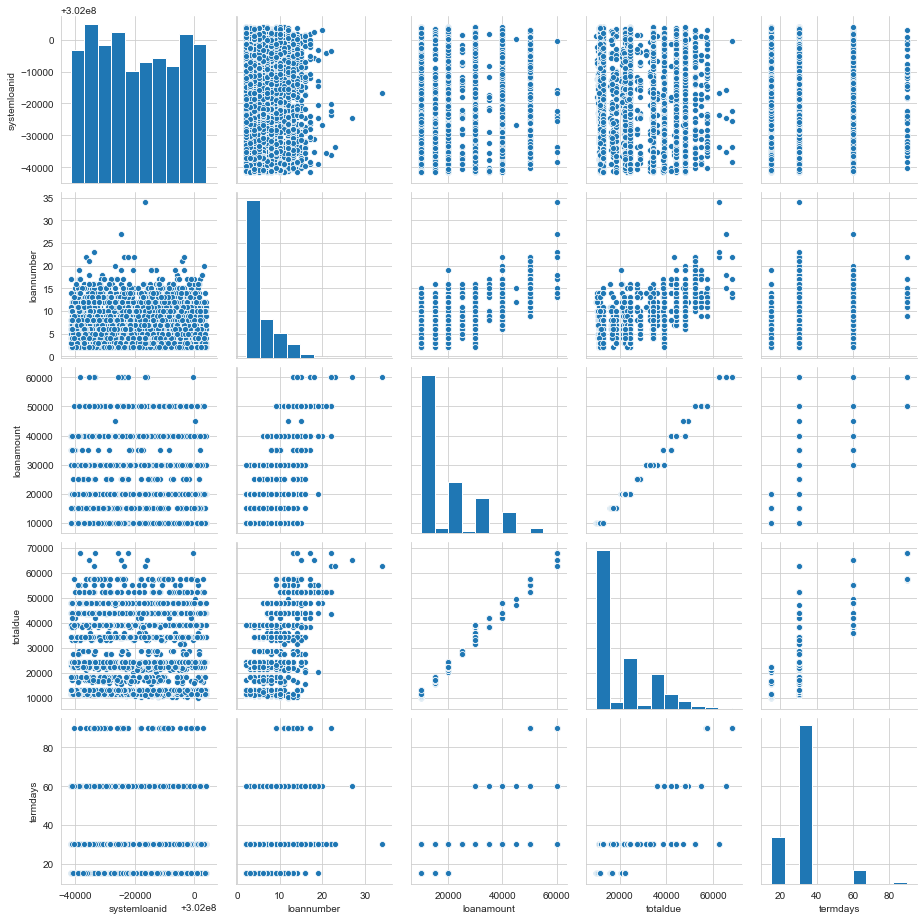

In [80]:
sns.pairplot(perf)

(0, 2000)

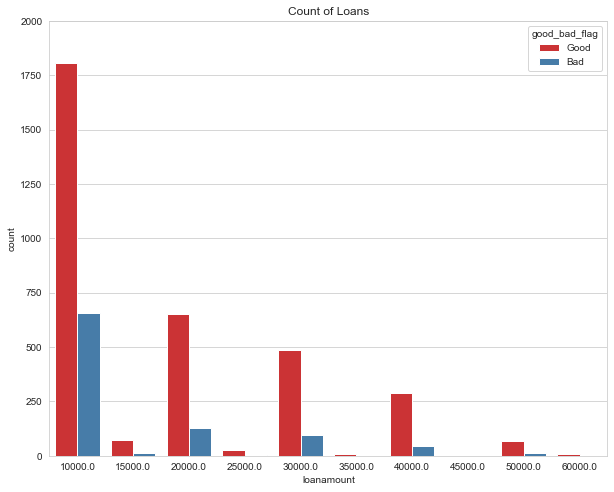

In [81]:
# Count plot to show sum by loan amount 

plt.figure(figsize=(10,8))
sns.countplot('loanamount', hue='good_bad_flag', data=trainperf, palette='Set1').set(title='Count of Loans')
plt.ylim(0,2000,250)

In [82]:
perf['loanamount'].unique()

array([30000., 15000., 20000., 10000., 40000., 25000., 50000., 35000.,
       45000., 60000.])

(0, 2000)

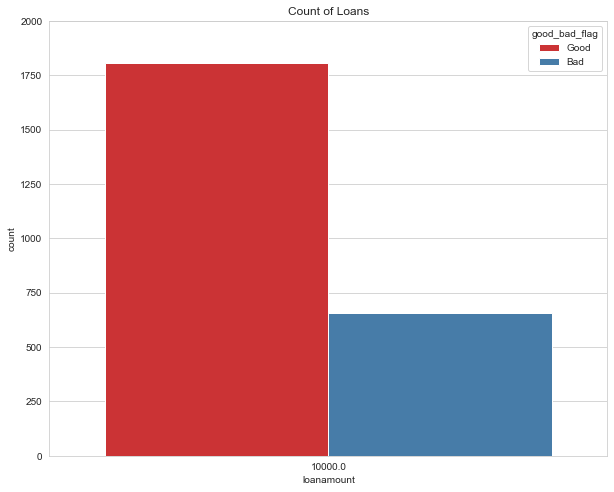

In [83]:
plt.figure(figsize=(10,8))
sns.countplot('loanamount', hue='good_bad_flag', data=trainperf[trainperf['loanamount'] ==10000.0], palette='Set1').set(title='Count of Loans')
plt.ylim(0,2000,250)

[Text(0.5, 1.0, 'Count of Loans')]

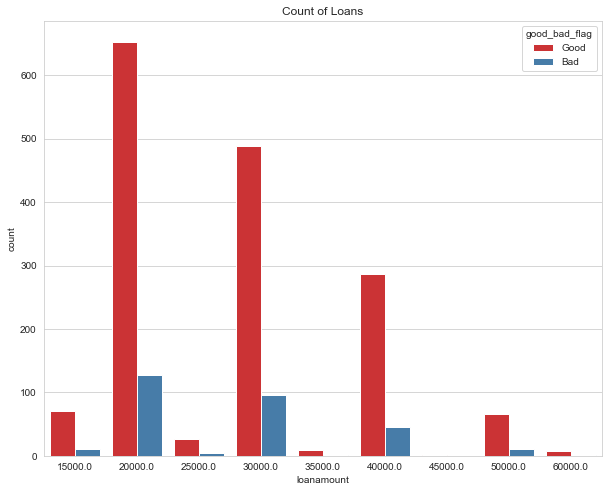

In [84]:
plt.figure(figsize=(10,8))
sns.countplot('loanamount', hue='good_bad_flag', data=trainperf[trainperf['loanamount'] != 10000.0], palette='Set1').set(title='Count of Loans')
# plt.ylim(0,2000,250)

In [85]:
# calculate interest obtained by the loan company

perf['interest'] = perf['totaldue'] - perf['loanamount']
perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,interest
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good,4500.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,Good,2250.0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,Good,2250.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,Good,1500.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good,4000.0


In [86]:
# check for distinct date in performance data

dates = perf['approveddate']
x= [str(x[:4]) for x in dates]
xdf = pd.DataFrame(x, columns=['Year'])
xdf['Year'].value_counts(dropna=False)[:4]

2017    4368
04:2      10
04:1      10
50:3       9
Name: Year, dtype: int64

In [87]:
others_termdays = trainperf[['termdays','good_bad_flag','loanamount']][trainperf['loanamount']!=10000.0]
others_termdays
term_days_count = others_termdays['termdays'].value_counts()

In [88]:
# 15 term days
fifteen_term = others_termdays[['termdays','good_bad_flag']][trainperf['termdays']==15 ]
print ( 'Percentage of bad loans for 15 term days is: ' + str((fifteen_term[fifteen_term['good_bad_flag']=='Bad'].shape[0] / term_days_count.loc[15]) * 100))

# 30 term days
thirty_term = others_termdays[['termdays','good_bad_flag']][trainperf['termdays']==30 ]
print ( 'Percentage of bad loans for 30 term days is: ' + str((thirty_term[thirty_term['good_bad_flag']=='Bad'].shape[0] / term_days_count.loc[30]) * 100))

# 60 term days
sixty_term = others_termdays[['termdays','good_bad_flag']][trainperf['termdays']==60 ]
print ( 'Percentage of bad loans for 60 term days is: ' + str((sixty_term[sixty_term['good_bad_flag']=='Bad'].shape[0] / term_days_count.loc[60]) * 100))

# 90 term days
ninety_term = others_termdays[['termdays','good_bad_flag']][trainperf['termdays']==90 ]
print ( 'Percentage of bad loans for 90 term days is: ' + str((ninety_term[ninety_term['good_bad_flag']=='Bad'].shape[0] / term_days_count.loc[90] ) * 100))




Percentage of bad loans for 15 term days is: 20.37037037037037
Percentage of bad loans for 30 term days is: 13.553370786516854
Percentage of bad loans for 60 term days is: 22.569444444444446
Percentage of bad loans for 90 term days is: 18.75


In [89]:
# Convert termdays into categorical variable
perf['termdays'] = perf['termdays'].apply(lambda x : 'fifteen' if x==15 else 'thirty' if x==30 else 'sixty' if x==60 else 'ninety')

In [90]:
perf['termdays'].unique()

array(['thirty', 'fifteen', 'sixty', 'ninety'], dtype=object)

In [91]:
data = perf

In [92]:
data.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,interest
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,thirty,Good,4500.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,thirty,Good,2250.0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,fifteen,Good,2250.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,fifteen,Good,1500.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,thirty,Good,4000.0


# Customer Demographics Data

#### Load, clean and explore demographics data for all the customers

In [93]:
# import customer demographics data and merge

traindemographics = pd.read_csv('traindemographics.csv.xls')
testdemographics = pd.read_csv('testdemographics.csv.xls')
dem1 = pd.concat([traindemographics, testdemographics], axis=0)

In [94]:
# reset index and drop previous index column

dem = dem1.reset_index()
dem.drop(['index'],axis=1,inplace=True)

In [95]:
dem.shape

(5833, 9)

In [96]:
# information about the data
dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5833 entries, 0 to 5832
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  5833 non-null   object 
 1   birthdate                   5833 non-null   object 
 2   bank_account_type           5833 non-null   object 
 3   longitude_gps               5833 non-null   float64
 4   latitude_gps                5833 non-null   float64
 5   bank_name_clients           5833 non-null   object 
 6   bank_branch_clients         65 non-null     object 
 7   employment_status_clients   4968 non-null   object 
 8   level_of_education_clients  797 non-null    object 
dtypes: float64(2), object(7)
memory usage: 410.3+ KB


In [97]:
# overview of the data
dem.head(10)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN
5,8a858f045bc9690c015bca251e9a4e95,1978-12-11 00:00:00.000000,Savings,3.330087,6.552518,GT Bank,NaN,Permanent,NaN
6,8a858ea05a859123015a8892914d15b7,1990-07-21 00:00:00.000000,Savings,3.365935,6.564823,Access Bank,NaN,Permanent,NaN
7,8a858f275c451af5015c546a50ce55ed,1986-09-09 00:00:00.000000,Savings,4.734382,7.606868,GT Bank,NaN,Permanent,NaN
8,8a858f405d13c45f015d13dd93ec0c1c,1992-11-17 00:00:00.000000,Savings,3.290590,6.612075,EcoBank,NaN,Permanent,NaN
9,8a858f735c161bda015c164d86632026,1965-02-23 00:00:00.000000,Savings,3.362783,6.509418,EcoBank,NaN,Permanent,NaN


In [98]:
# check for missing values
dem.isna().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           5768
employment_status_clients      865
level_of_education_clients    5036
dtype: int64

In [99]:
# drop irrelevant features/columns in the data
dem.drop(['bank_branch_clients', 'level_of_education_clients'], axis=1, inplace=True)
dem.head(2)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,Permanent


In [100]:
dem.dropna(axis=0, inplace=True)

In [101]:
# check for missing values in the demographics data
dem.isna().sum()

customerid                   0
birthdate                    0
bank_account_type            0
longitude_gps                0
latitude_gps                 0
bank_name_clients            0
employment_status_clients    0
dtype: int64

In [102]:
dem['employment_status_clients'].isna().sum()

0

In [104]:
dem['birthdate'].head(2)

1    1986-01-21 00:00:00.000000
3    1991-07-19 00:00:00.000000
Name: birthdate, dtype: object

In [105]:
# calculate length of characters for entries in the birthdate column
dem['birthdate']

1       1986-01-21 00:00:00.000000
3       1991-07-19 00:00:00.000000
4       1982-11-22 00:00:00.000000
5       1978-12-11 00:00:00.000000
6       1990-07-21 00:00:00.000000
                   ...            
5828    1976-04-13 00:00:00.000000
5829    1990-10-24 00:00:00.000000
5830    1988-06-12 00:00:00.000000
5831    1974-03-23 00:00:00.000000
5832    1987-02-16 00:00:00.000000
Name: birthdate, Length: 4968, dtype: object

In [106]:
# split birthdate column into date of birth (DOB) and timestamp
dem[['DOB','timestamp']] = dem.birthdate.str.split(' ',expand=True)
dem.head(2)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,DOB,timestamp
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,Permanent,1986-01-21,00:00:00.000000
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,Permanent,1991-07-19,00:00:00.000000


In [107]:
# drop timestamp column
dem.drop(['timestamp'], axis=1, inplace=True)

# split DOB column into year, month and day
dem[['Year','Month', 'Day']] = dem.DOB.str.split('-',expand=True)

In [108]:
# calculate age of borrowers(clients) based on year in performance data - 2017
dem['Age'] = [2017 - int(y) for y in dem['Year']]
dem.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,DOB,Year,Month,Day,Age
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,Permanent,1986-01-21,1986,01,21,31
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,Permanent,1991-07-19,1991,07,19,26
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,Permanent,1982-11-22,1982,11,22,35
5,8a858f045bc9690c015bca251e9a4e95,1978-12-11 00:00:00.000000,Savings,3.330087,6.552518,GT Bank,Permanent,1978-12-11,1978,12,11,39
6,8a858ea05a859123015a8892914d15b7,1990-07-21 00:00:00.000000,Savings,3.365935,6.564823,Access Bank,Permanent,1990-07-21,1990,07,21,27


In [109]:
# drop DOB, year, month and day columns and retain age column for further analysis
dem.drop(['DOB', 'Year', 'Month', 'Day'], axis=1, inplace=True)
dem['Age'].tail()

5828    41
5829    27
5830    29
5831    43
5832    30
Name: Age, dtype: int64

In [110]:
# current shape of data
dem.shape

(4968, 8)

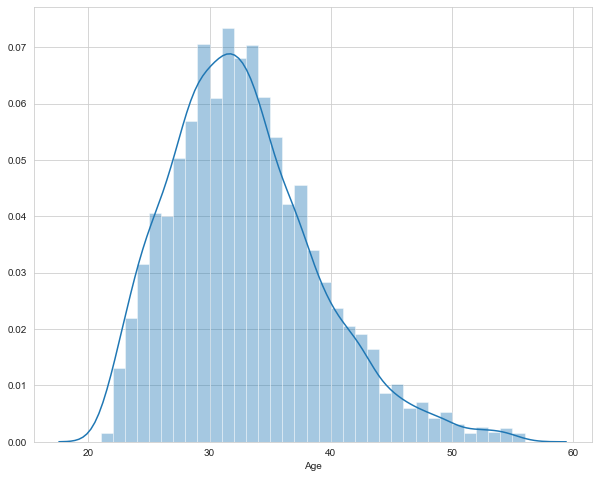

In [111]:
# viz to show distribution of ages in the data
plt.figure(figsize=(10,8))
sns.distplot(dem['Age'], bins = 35)

In [112]:
# Merge the demographics data with the performance data (data)
data = pd.merge(perf, dem, how='outer', on=['customerid'])
data.head(3)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,interest,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,Age
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,thirty,Good,4500.0,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent,45.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,thirty,Good,2250.0,1985-08-23 00:00:00.000000,Savings,3.885298,7.320700,GT Bank,Permanent,32.0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,fifteen,Good,2250.0,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,Permanent,33.0


In [113]:
dem['bank_account_type'].value_counts(normalize=True)

Savings    0.750805
Other      0.233293
Current    0.015902
Name: bank_account_type, dtype: float64

# Previous Loan Data

#### Prepare previous loan data

In [114]:
# import previous loans data and merge
trainprevloans = pd.read_csv('trainprevloans.csv.xls')
testprevloans = pd.read_csv('testprevloans.csv.xls')
prev1 = pd.concat([trainprevloans, testprevloans], axis=0)

In [115]:
# reset data index and drop previous index column
prev = prev1.reset_index()
prev.drop(['index'],axis=1,inplace=True)

In [116]:
prev.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [117]:
prev['firstduedate'].tail(10)

24080    2017-06-06 00:00:00.000000
24081    2016-12-02 00:00:00.000000
24082    2017-02-20 00:00:00.000000
24083    2017-06-28 00:00:00.000000
24084    2017-05-30 00:00:00.000000
24085    2017-05-09 00:00:00.000000
24086    2017-05-02 00:00:00.000000
24087    2017-07-26 00:00:00.000000
24088    2017-06-02 00:00:00.000000
24089    2017-07-31 00:00:00.000000
Name: firstduedate, dtype: object

In [118]:
# aggregate loan amount and total due by customer id
cust_grp = prev[['loanamount', 'totaldue']].groupby(prev['customerid']).mean()
cust_grp = cust_grp.reset_index()
cust_grp.columns = ['customerid','avg_loanamount','avg_totaldue']
cust_grp.head()

,customerid,avg_loanamount,avg_totaldue
0,8a1088a0484472eb01484669e3ce4e0b,10000.000000,11500.000000
1,8a1a1e7e4f707f8b014f797718316cad,17500.000000,22375.000000
2,8a1a32fc49b632520149c3b8fdf85139,12857.142857,15214.285714
3,8a1eb5ba49a682300149c3c068b806c7,16250.000000,20300.000000
4,8a1edbf14734127f0147356fdb1b1eb2,10000.000000,12250.000000


In [119]:
# merge data with formatted dataset and calculate average interest 
data = pd.merge(data, cust_grp, how='outer', on=['customerid'])
data[['avg_loanamount','avg_totaldue']] = data[['avg_loanamount','avg_totaldue']].fillna(0)
data['avg_interest'] = data['avg_totaldue'] - data['avg_loanamount']
data.tail()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,interest,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,Age,avg_loanamount,avg_totaldue,avg_interest
5828,8a858fb45bb59c21015bb88a191f58f2,301991141,3,47:02.0,46:53.0,10000.0,11500.0,fifteen,NaN,1500.0,1990-04-10 00:00:00.000000,Savings,3.379678,6.541521,First Bank,Permanent,27.0,10000.000000,11500.000000,1500.0
5829,8a858fcb5b00cc54015b0253ced26a5f,301963018,3,00:45.0,04:05.0,10000.0,13000.0,thirty,NaN,3000.0,1977-08-17 00:00:00.000000,Savings,3.350815,6.583876,GT Bank,Permanent,40.0,10000.000000,11500.000000,1500.0
5830,8a858fde56eb02280156f59b976d46c0,301994653,9,09:40.0,09:33.0,40000.0,48000.0,sixty,NaN,8000.0,1994-01-06 00:00:00.000000,Savings,6.723491,6.201512,Diamond Bank,Permanent,23.0,18125.000000,22075.000000,3950.0
5831,8a858e10570f2d65015717fcfec44996,301961483,14,47:54.0,46:49.0,60000.0,68100.0,ninety,NaN,8100.0,1989-07-08 00:00:00.000000,Other,3.547064,6.864409,Union Bank,Permanent,28.0,30384.615385,36084.615385,5700.0
5832,8a858f605b911d60015b91b99d55400d,301973097,6,12:09.0,12:03.0,20000.0,22250.0,fifteen,NaN,2250.0,1974-03-01 00:00:00.000000,Savings,5.090046,8.125467,Zenith Bank,Permanent,43.0,10000.000000,11350.000000,1350.0


In [120]:
data['Age'].min(), data['Age'].max()

(21.0, 56.0)

In [121]:
# Check if all the Date values in the Previous data dataframe do not contain errors befor used to obtain date difference
d = prev['approveddate']
d1= [str(x[:4]) for x in d]
d2 = pd.DataFrame(d1, columns=['Year'])
d2['Year'].value_counts(dropna=False)

2017    17521
2016     6569
Name: Year, dtype: int64

In [122]:
# check for missing values in the average interest column
data['avg_interest'].isna().sum()

0

In [123]:
prev.head(2)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000


In [124]:
# split 'firstduedate' and 'firstrepaiddate' columns based on date and time for further analysis
prev[['fd_date', 'fd_time']] = prev.firstduedate.str.split(' ', expand=True)
prev[['fr_date', 'fr_time']] = prev.firstrepaiddate.str.split(' ', expand=True)

In [125]:
prev.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,fd_date,fd_time,fr_date,fr_time
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,2016-09-14,00:00:00.000000,2016-09-01,15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,2017-05-30,00:00:00.000000,2017-05-26,00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000,2017-04-04,00:00:00.000000,2017-04-26,22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000,2017-04-24,00:00:00.000000,2017-04-24,00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000,2017-07-03,00:00:00.000000,2017-07-14,21:08:35.000000


In [126]:
# drop time columns
prev.drop(['fd_time', 'fr_time'], axis=1, inplace=True)

In [127]:
prev['fr_date']

0        2016-09-01
1        2017-05-26
2        2017-04-26
3        2017-04-24
4        2017-07-14
            ...    
24085    2017-05-02
24086    2017-04-25
24087    2017-07-13
24088    2017-06-01
24089    2017-07-29
Name: fr_date, Length: 24090, dtype: object

In [128]:
# split the firstduedate column (This converts each observation into a list)
prev['fd_date'] = prev['fd_date'].apply(lambda x: x.split('-'))

# convert all elements in each observation(list) from str to int
prev['fd_date'] = prev['fd_date'].apply(lambda x: [int(y) for y in x ])

# convert each observation into a date format
prev['fd_date'] = prev['fd_date'].apply(lambda x : date(x[0], x[1], x[2]))

# split the firstrepaiddate (This converts each observation into a list)
prev['fr_date'] = prev['fr_date'].apply(lambda x: x.split('-'))

# convert all elements in each observation(list) from str to int
prev['fr_date'] = prev['fr_date'].apply(lambda x: [int(y) for y in x ])

# convert each observation into a date format
prev['fr_date'] = prev['fr_date'].apply(lambda x : date(x[0], x[1], x[2]))

In [129]:
# Calculate repayment_score
prev['repayment_score'] = prev['fd_date'] - prev['fr_date']

In [130]:
prev.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,fd_date,fr_date,repayment_score
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,2016-09-14,2016-09-01,13 days
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,2017-05-30,2017-05-26,4 days
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000,2017-04-04,2017-04-26,-22 days
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000,2017-04-24,2017-04-24,0 days
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000,2017-07-03,2017-07-14,-11 days


In [131]:
# obtaining number of days as int from repayment score column
prev['repayment_score'] = prev['repayment_score'].astype('str').apply(lambda x: int(x[:2]))

In [132]:
prev.head(2)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,fd_date,fr_date,repayment_score
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,2016-09-14,2016-09-01,13
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,2017-05-30,2017-05-26,4


In [133]:
prev['repayment_score'].value_counts()

 0     4499
 1     2445
 3     1934
 2     1906
-1     1730
 4     1477
 5     1296
 7     1086
 6      992
-2      792
 8      449
 10     413
 9      399
-3      378
-4      378
 11     364
 12     352
 14     329
 13     315
 15     291
-5      222
-6      222
-7      210
-8      179
-9      162
 17     161
 16     153
 20     110
 19     103
 21      96
 18      92
 22      74
 25      74
 28      64
 23      61
 26      59
 27      58
 24      56
 30      47
 29      39
 31      12
 32      10
 63       1
Name: repayment_score, dtype: int64

[Text(0.5, 1.0, 'Scatter plot of Repayment Score')]

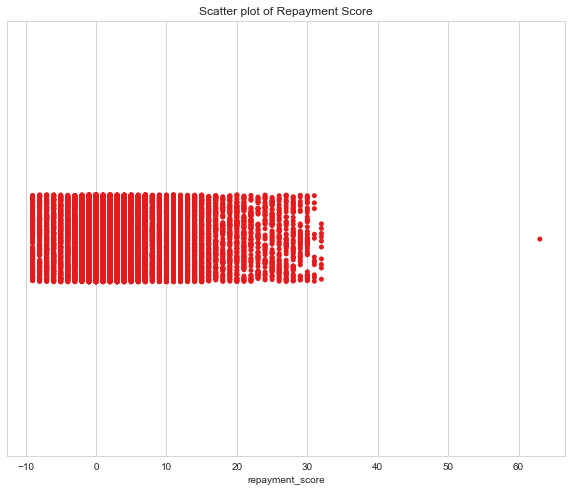

In [134]:
# check for outliers using boxplot chart
plt.figure(figsize=(10,8))
sns.stripplot(prev['repayment_score'], jitter=True, palette='Set1').set(title='Scatter plot of Repayment Score')

In [135]:
# check for outlier 
prev[prev['repayment_score'] ==63].head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,fd_date,fr_date,repayment_score
23340,8a858f305c8dd672015c9d62596676c3,301936748,1,2017-06-13 04:00:53.000000,2017-06-13 02:59:45.000000,10000.0,13000.0,30,2017-07-13 07:03:43.000000,8a858f305c8dd672015c96373f210cb5,2017-09-14 00:00:00.000000,2017-07-13 06:53:33.000000,2017-09-14,2017-07-13,63


In [136]:
# preview of sum of repayment score per unique customerid

prev[['customerid','repayment_score']].groupby(prev['customerid']).sum()

,repayment_score
customerid,
8a1088a0484472eb01484669e3ce4e0b,-6
8a1a1e7e4f707f8b014f797718316cad,1
8a1a32fc49b632520149c3b8fdf85139,3
8a1eb5ba49a682300149c3c068b806c7,25
8a1edbf14734127f0147356fdb1b1eb2,8
...,...
8a858fff5c79144c015c7bdbfc086ce1,5
8aaae7a74400b28201441c8b62514150,2
8aab10f748cf78ff0148d11fac1447a6,-2


In [137]:
# pass sum of repayment score per unique customerid into a variable
gp = prev[['customerid','repayment_score']].groupby(prev['customerid']).sum()
gp= gp.reset_index()
gp.shape, prev.shape

((5801, 2), (24090, 15))

In [138]:
# merge variable to standing data
data = pd.merge(data, gp, how='outer', on=['customerid'])

In [139]:
# fill missing entries in repayment score column with zeros
data['repayment_score'] = data['repayment_score'].fillna(0)

## Wrapping up

#### Final data exploration and prepation

In [140]:
# check for missing values in data
data.isna().sum()

customerid                      0
systemloanid                    0
loannumber                      0
approveddate                    0
creationdate                    0
loanamount                      0
totaldue                        0
termdays                        0
good_bad_flag                1454
interest                        0
birthdate                     865
bank_account_type             865
longitude_gps                 865
latitude_gps                  865
bank_name_clients             865
employment_status_clients     865
Age                           865
avg_loanamount                  0
avg_totaldue                    0
avg_interest                    0
repayment_score                 0
dtype: int64

In [157]:
# drop missing row values in data
data.dropna(axis=0, inplace=True)

In [158]:
# check for missing values in data
data.isna().sum()

customerid                   0
systemloanid                 0
loannumber                   0
approveddate                 0
creationdate                 0
loanamount                   0
totaldue                     0
termdays                     0
good_bad_flag                0
interest                     0
birthdate                    0
bank_account_type            0
longitude_gps                0
latitude_gps                 0
bank_name_clients            0
employment_status_clients    0
Age                          0
avg_loanamount               0
avg_totaldue                 0
avg_interest                 0
repayment_score              0
dtype: int64

In [159]:
# calculate loan_deviation - difference between borrower's current loan amount and average loan amount
# P.S: Clients with huge loan_deviation could have their loan applications flagged
data['loan_deviation'] = data['loanamount'] - data['avg_loanamount']

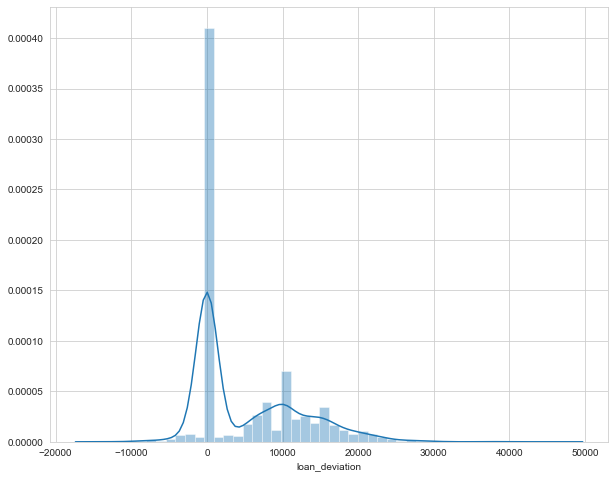

In [160]:
# check distibution of load deviation 
plt.figure(figsize=(10,8))
sns.distplot(data['loan_deviation'])

## Further processing

#### Final processing before creating model

In [165]:
data.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'interest', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients', 'Age',
       'avg_loanamount', 'avg_totaldue', 'avg_interest', 'repayment_score',
       'loan_deviation'],
      dtype='object')

In [166]:
# pass required features into a variable
features = ['loannumber','loanamount','totaldue','termdays','good_bad_flag','interest',
           'bank_account_type','bank_name_clients','employment_status_clients','Age',
           'avg_loanamount','avg_totaldue','avg_interest','repayment_score','loan_deviation']

In [167]:
# check features to be passed into model
data[features]

,loannumber,loanamount,totaldue,termdays,good_bad_flag,interest,bank_account_type,bank_name_clients,employment_status_clients,Age,avg_loanamount,avg_totaldue,avg_interest,repayment_score,loan_deviation
0,12,30000.0,34500.0,thirty,Good,4500.0,Other,Diamond Bank,Permanent,45.0,18181.818182,22081.818182,3900.000000,79.0,11818.181818
1,2,15000.0,17250.0,thirty,Good,2250.0,Savings,GT Bank,Permanent,32.0,0.000000,0.000000,0.000000,0.0,15000.000000
2,7,20000.0,22250.0,fifteen,Good,2250.0,Other,EcoBank,Permanent,33.0,10000.000000,11750.000000,1750.000000,22.0,10000.000000
3,3,10000.0,11500.0,fifteen,Good,1500.0,Savings,First Bank,Permanent,40.0,10000.000000,12250.000000,2250.000000,-5.0,0.000000
4,9,40000.0,44000.0,thirty,Good,4000.0,Other,GT Bank,Permanent,31.0,18750.000000,23550.000000,4800.000000,25.0,21250.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,3,10000.0,11500.0,fifteen,Good,1500.0,Savings,GT Bank,Permanent,27.0,10000.000000,11500.000000,1500.000000,1.0,0.000000
4372,8,15000.0,18375.0,thirty,Bad,3375.0,Savings,Diamond Bank,Student,32.0,13571.428571,16950.000000,3378.571429,10.0,1428.571429
4375,2,10000.0,13000.0,thirty,Bad,3000.0,Savings,FCMB,Permanent,28.0,10000.000000,13000.000000,3000.000000,4.0,0.000000
4376,3,10000.0,11500.0,fifteen,Bad,1500.0,Savings,First Bank,Permanent,28.0,10000.000000,11500.000000,1500.000000,-1.0,0.000000


## Reference Point

In [168]:
# redeclare features in variable
data = data[features]

In [169]:
# split data based on loan amount 
data_10k = data[data['loanamount'] == 10000.0]
data_others = data[data['loanamount']!=10000.0]
print (data_10k.shape)
print (data_others.shape)

(2034, 15)
(1688, 15)


In [172]:
# declaring categorical variables for one hot encoding
category = ['termdays','bank_name_clients','employment_status_clients','bank_account_type']

In [173]:
# one hot encoding for categorical variables
data_10k = pd.get_dummies(data_10k, columns=category, drop_first=True)
data_others = pd.get_dummies(data_others, columns=category, drop_first=True)

KeyError: "None of [Index(['termdays', 'bank_name_clients', 'employment_status_clients',\n       'bank_account_type'],\n      dtype='object')] are in the [columns]"

In [181]:
data_10k.shape, data_others.shape

((2034, 36), (1688, 38))

In [182]:
# overview of data with 10k loan amount
data_10k.head()

,loannumber,loanamount,totaldue,good_bad_flag,interest,Age,avg_loanamount,avg_totaldue,avg_interest,repayment_score,...,bank_name_clients_Unity Bank,bank_name_clients_Wema Bank,bank_name_clients_Zenith Bank,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,bank_account_type_Other,bank_account_type_Savings
3,3,10000.0,11500.0,Good,1500.0,40.0,10000.0,12250.0,2250.0,-5.0,...,0,0,0,1,0,0,0,0,0,1
6,3,10000.0,13000.0,Good,3000.0,28.0,10000.0,12250.0,2250.0,5.0,...,0,0,0,1,0,0,0,0,0,1
8,4,10000.0,11500.0,Good,1500.0,30.0,10000.0,11500.0,1500.0,-4.0,...,0,0,0,1,0,0,0,0,0,1
9,2,10000.0,11500.0,Good,1500.0,33.0,10000.0,11500.0,1500.0,3.0,...,0,0,0,0,0,0,0,1,0,1
10,2,10000.0,13000.0,Good,3000.0,34.0,10000.0,11500.0,1500.0,2.0,...,0,0,0,1,0,0,0,0,0,1


In [183]:
# overview of data with loan amount not equal to 10k
data_others.head()

,loannumber,loanamount,totaldue,good_bad_flag,interest,Age,avg_loanamount,avg_totaldue,avg_interest,repayment_score,...,bank_name_clients_Unity Bank,bank_name_clients_Wema Bank,bank_name_clients_Zenith Bank,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,bank_account_type_Other,bank_account_type_Savings
0,12,30000.0,34500.0,Good,4500.0,45.0,18181.818182,22081.818182,3900.000000,79.0,...,0,0,0,1,0,0,0,0,1,0
1,2,15000.0,17250.0,Good,2250.0,32.0,0.000000,0.000000,0.000000,0.0,...,0,0,0,1,0,0,0,0,0,1
2,7,20000.0,22250.0,Good,2250.0,33.0,10000.000000,11750.000000,1750.000000,22.0,...,0,0,0,1,0,0,0,0,1,0
4,9,40000.0,44000.0,Good,4000.0,31.0,18750.000000,23550.000000,4800.000000,25.0,...,0,0,0,1,0,0,0,0,1,0
5,8,30000.0,39000.0,Good,9000.0,45.0,14285.714286,17828.571429,3542.857143,38.0,...,0,0,0,1,0,0,0,0,0,1


In [184]:
# check for missing values in data with 10k loan amount
data_10k['good_bad_flag'].isna().sum()

0

In [187]:
# check for missing values in data with loan amount not equal to 10k
data_10k['good_bad_flag'].value_counts(normalize=True,dropna=False)

Good    0.748771
Bad     0.251229
Name: good_bad_flag, dtype: float64

In [188]:
# replace values for target variables as discrete variables
data_10k['good_bad_flag'] = data_10k['good_bad_flag'].replace({'Good': 0, 'Bad':1})
data_others['good_bad_flag'] = data_others['good_bad_flag'].replace({'Good': 0, 'Bad':1})

In [190]:
data_10k['good_bad_flag'].value_counts()

0    1523
1     511
Name: good_bad_flag, dtype: int64

In [191]:
data_others['good_bad_flag'].value_counts()

0    1437
1     251
Name: good_bad_flag, dtype: int64

# Wrap-up

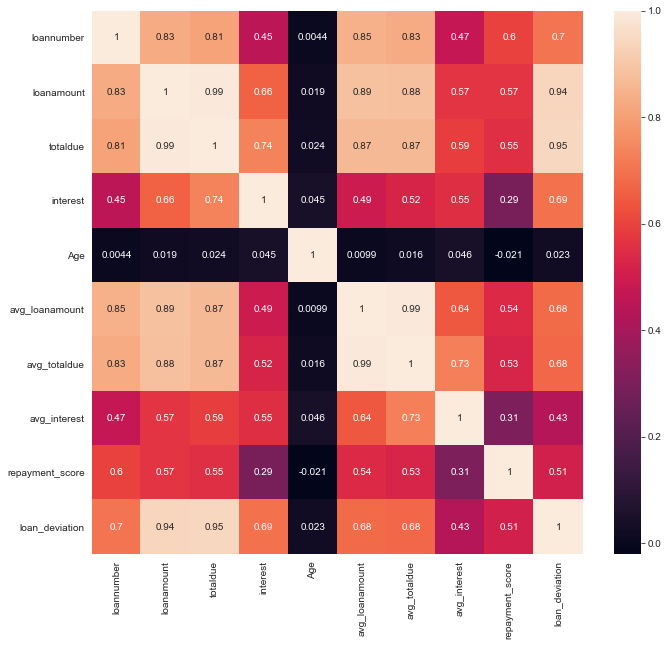

In [230]:
plt.figure(figsize=(11,10))
sns.heatmap(data.corr(), annot=True)

In [233]:
data[['loannumber', 'loanamount']]

,loannumber,loanamount
0,12,30000.0
1,2,15000.0
2,7,20000.0
3,3,10000.0
4,9,40000.0
...,...,...
4371,3,10000.0
4372,8,15000.0
4375,2,10000.0
4376,3,10000.0


## Creating the Model

#### Create and evaluate the model

In [236]:
# import more tools 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

import itertools

### Splitting the data

In [193]:
# storing dependent and target features for data with 10k loan amount in variables
X = data_10k.drop('good_bad_flag',axis=1)
y =  data_10k['good_bad_flag']

In [194]:
# splitting data with 10k loan amount into train and test
data10k_X_train, data10k_X_test, data10k_y_train, data10k_y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [195]:
# storing dependent and target features for data with loan amount other than 10k in variables
X_others = data_others.drop('good_bad_flag',axis=1)
y_others =  data_others['good_bad_flag']

In [196]:
# splitting data with loan amount other than 10k into train and test
data_others_X_train, data_others_X_test, data_others_y_train, data_others_y_test = train_test_split(X_others, y_others, test_size=0.3, random_state=100)

### Creating the Model

#### Creating Model using the data with 10k loan amount

In [197]:
# fitting the data to the model
model = DecisionTreeClassifier(max_depth=3)

model.fit(data10k_X_train, data10k_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [198]:
y_pred = model.predict(data10k_X_test)

In [199]:
print('Train score : ' + str(model.score(data10k_X_train,data10k_y_train)))
print('Test Score  : ' + str(model.score(data10k_X_test,data10k_y_test)))

Train score : 0.7737174982431483
Test Score  : 0.7332242225859247


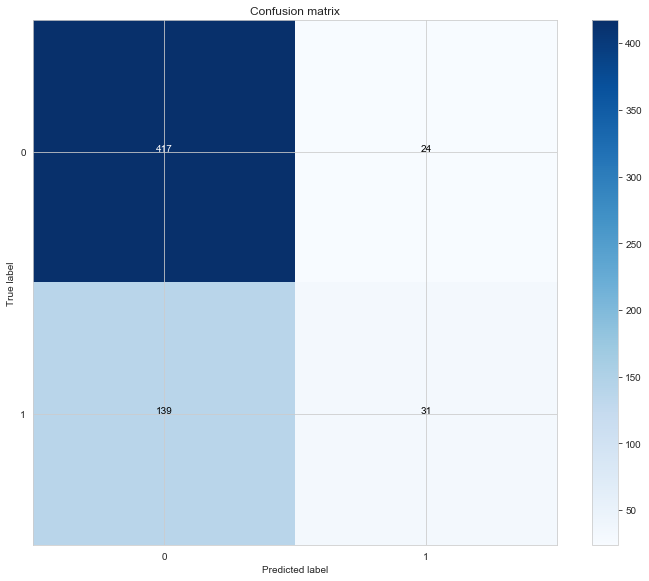

In [205]:
# plot confusion matrix
cnf_matrix = confusion_matrix(data10k_y_test,y_pred)
np.set_printoptions(precision=2)


class_names = [0,1]

plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

#### Creating Model using data with loan amount other than 10k 

In [206]:
# fitting the data to the model
model = DecisionTreeClassifier(max_depth=3)

model.fit(data_others_X_train, data_others_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [207]:
y2_pred = model.predict(data_others_X_test)

In [208]:
print('Train score : ' + str(model.score(data_others_X_train,data_others_y_train)))
print('Test Score  : ' + str(model.score(data_others_X_test,data_others_y_test)))

Train score : 0.8509737510584251
Test Score  : 0.8560157790927022


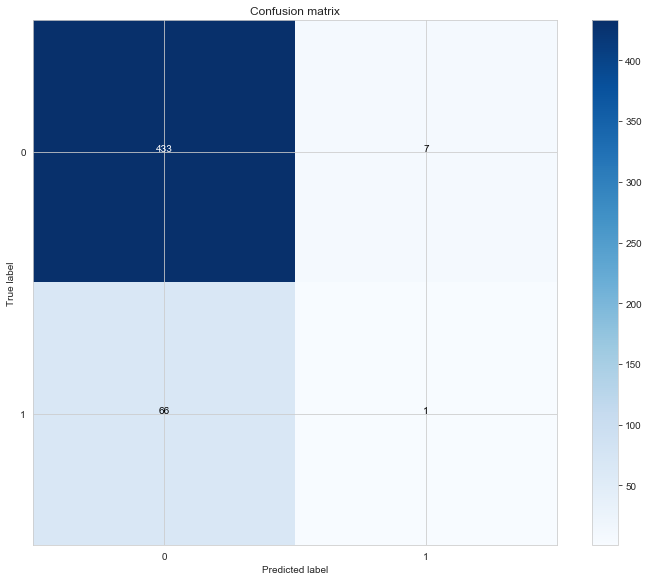

In [211]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(data_others_y_test,y2_pred)
np.set_printoptions(precision=2)


class_names = [0,1]

plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

#### Creating Model using the whole data

In [213]:
# storing dependent and target features for the data
X2 = data.drop('good_bad_flag',axis=1)
y2 =  data['good_bad_flag']

In [214]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [215]:
# fitting the data to the model
model2 = DecisionTreeClassifier(max_depth=3)

model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [216]:
y3_pred = model2.predict(X_test)

In [218]:
print('Train score : ' + str(model2.score(X_train, y_train)))
print('Test Score  : ' + str(model2.score(X_test, y_test)))

Train score : 0.7737174982431483
Test Score  : 0.7332242225859247


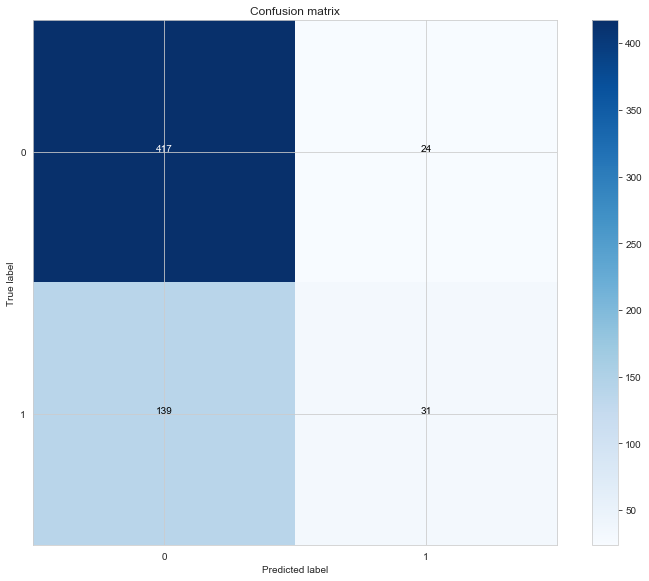

In [219]:
# plot confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)


class_names = [0,1]

plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

# Random Forest

In [220]:
# further analysis using random forest to improve model performance
from sklearn.ensemble import RandomForestClassifier

In [221]:
model3 = RandomForestClassifier()

In [223]:
model3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [234]:
y4_pred = model3.predict(X_test)

In [237]:
print(accuracy_score(y_test, y4_pred))
print('\n')
print(classification_report(y_test, y4_pred))
print('\n')
print(confusion_matrix(y_test, y4_pred))

0.7168576104746317


              precision    recall  f1-score   support

           0       0.76      0.89      0.82       441
           1       0.48      0.26      0.34       170

    accuracy                           0.72       611
   macro avg       0.62      0.58      0.58       611
weighted avg       0.68      0.72      0.69       611



[[394  47]
 [126  44]]
